In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [46]:
num_rows = 1000
# create a dictionary of lists
data = {
    "x_1": np.random.normal(0, 1, num_rows),
    "x_2": np.random.normal(0, 1, num_rows),
    "x_3": np.random.normal(0, 1, num_rows),
    "x_4": np.random.normal(0, 1, num_rows),
    "x_5": np.random.normal(0, 1, num_rows),
}
beta = [0.5, 1, 1, 1, 1, 1]

# create a data frame from the dictionary
df = pd.DataFrame(data)
df["comb"] = (
    beta[0]
    + beta[1] * df["x_1"]
    + beta[2] * df["x_2"]
    + beta[3] * df["x_3"]
    + beta[4] * df["x_4"]
    + beta[5] * df["x_5"]
)
df["prob"] = 1 / (1 + np.exp(-df["comb"]))
df["y"] = np.random.binomial(1, df["prob"], num_rows)
df.head(n=10)

,x_1,x_2,x_3,x_4,x_5,comb,prob,y
0,1.011993,-1.265558,-0.696116,0.053018,-1.847183,-2.243847,0.095882,0
1,-0.277874,-0.678104,0.629843,-3.818681,1.283519,-2.361297,0.086172,0
2,-2.202255,1.697551,0.194607,-2.440929,0.754630,-1.496398,0.182963,0
3,0.588036,1.040137,-0.401171,-1.277904,-1.598680,-1.149583,0.240565,0
4,-0.316860,1.874260,-0.717545,1.956875,-0.451168,2.845562,0.945089,1
5,-0.555359,-0.883826,1.485302,0.779894,0.781444,2.107455,0.891626,1
6,1.150986,1.147570,0.809858,-0.467668,0.218031,3.358778,0.966391,1
7,-0.071128,-0.195355,-0.916789,-0.768304,0.494744,-0.956831,0.277513,0
8,0.514753,1.163413,0.721115,0.577711,-0.481366,2.995627,0.952376,1
9,0.978147,-0.027234,-1.447150,-0.986147,0.846074,-0.136309,0.465975,0


In [47]:
def generate_data(num_rows):
    data = {
        "x_1": np.random.normal(0, 1, num_rows),
        "x_2": np.random.normal(0, 1, num_rows),
        "x_3": np.random.normal(0, 1, num_rows),
        "x_4": np.random.normal(0, 1, num_rows),
        "x_5": np.random.normal(0, 1, num_rows),
    }
    beta = [0.5, 1, 1, 1, 1, 1]

    # create a data frame from the dictionary
    df = pd.DataFrame(data)
    df["comb"] = (
        beta[0]
        + beta[1] * df["x_1"]
        + beta[2] * df["x_2"]
        + beta[3] * df["x_3"]
        + beta[4] * df["x_4"]
        + beta[5] * df["x_5"]
    )
    df["prob"] = 1 / (1 + np.exp(-df["comb"]))
    df["y"] = np.random.binomial(1, df["prob"], num_rows)
    y = df["y"]
    X = df.drop(columns=["y", "prob", "comb"])
    return X, y

In [48]:
X, y = generate_data(50)
lm = linear_model.LogisticRegression()
lm.fit(X, y)
print(lm.coef_)
print(lm.intercept_)

[[0.69198633 0.73763522 0.63950615 0.60765494 1.10833957]]
[0.71039648]


In [49]:
regularization = ["l1", "l2"]
number_of_sample = [
    50,
    60,
    70,
    80,
    90,
    100,
    150,
    200,
    300,
    500,
    750,
    1000,
    2000,
    4000,
]
number_of_repeat = 100

data_frame = pd.DataFrame(columns=["number_of_sample", "regularization", "mse"])
for sample in number_of_sample:
    for reg in regularization:
        for i in range(number_of_repeat):
            X, y = generate_data(sample)
            lm = linear_model.LogisticRegression(penalty=reg, solver="saga")
            lm.fit(X, y)
            if reg is None:
                reg_text = "none"
            else:
                reg_text = reg
            mse = mean_squared_error(lm.coef_[0], [1, 1, 1, 1, 1])
            data_frame.loc[len(data_frame.index)] = [sample, reg_text, mse]

Text(0.5, 1.0, 'Boxplot of MSE for different sample size and regularization methods\nbuild on full data repeated 100 times')

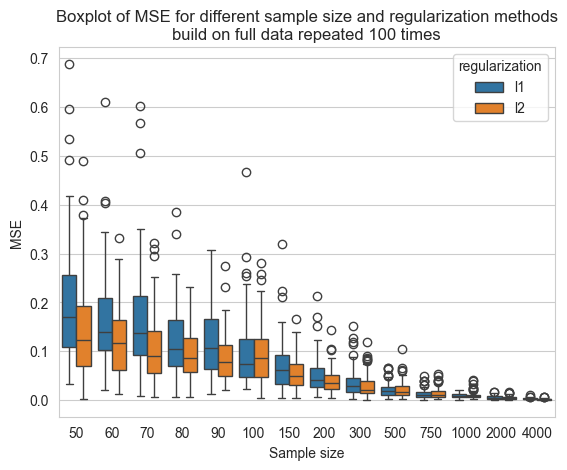

In [50]:
sns.set_style("whitegrid")
sns.boxplot(x="number_of_sample", y="mse", data=data_frame, hue="regularization")
plt.xlabel("Sample size")
plt.ylabel("MSE")
plt.title(
    "Boxplot of MSE for different sample size and regularization methods\nbuild on full data repeated 100 times"
)

In [51]:
regularization = ["l1", "l2"]
number_of_sample = [
    50,
    60,
    70,
    80,
    90,
    100,
    150,
    200,
    300,
    500,
    750,
    1000,
    1500,
    2000,
    3000,
    4000,
]
number_of_repeat = 100

data_frame = pd.DataFrame(columns=["number_of_sample", "regularization", "mse"])
for sample in number_of_sample:
    for reg in regularization:
        for i in range(number_of_repeat):
            X, y = generate_data(sample)
            lm = linear_model.LogisticRegression(penalty=reg, solver="saga")
            lm.fit(X, y)
            if reg is None:
                reg_text = "none"
            else:
                reg_text = reg
            mse = mean_squared_error(lm.coef_[0], [1, 1, 1, 1, 1])
            data_frame.loc[len(data_frame.index)] = [sample, reg_text, mse]

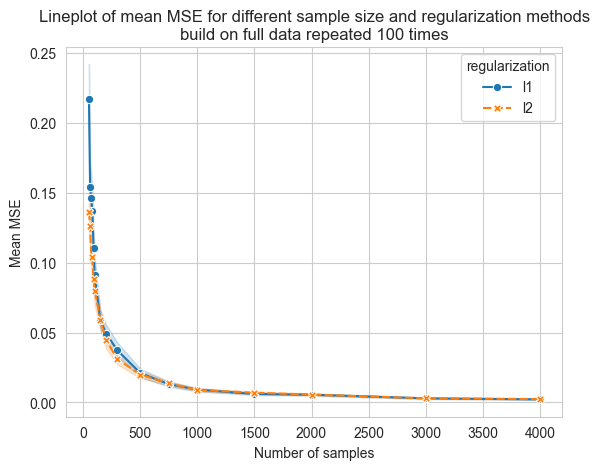

In [52]:
means = data_frame.groupby(["number_of_sample", "regularization"]).mean().reset_index()
# sns.barplot(
#     x="number_of_sample",
#     y="mse",
#     data=means,
#     hue="regularization",
# )

sns.lineplot(
    x="number_of_sample",
    y="mse",
    data=data_frame,
    hue="regularization",
    markers=True,
    style="regularization",
)
plt.title(
    "Lineplot of mean MSE for different sample size and regularization methods\nbuild on full data repeated 100 times"
)
plt.xlabel("Number of samples")
plt.ylabel("Mean MSE")
plt.show()

# Model based just on 3 variables

In [61]:
number_of_sample = [
    50,
    60,
    70,
    80,
    90,
    100,
    150,
    200,
    300,
    400,
    500,
    750,
    1000,
    1500,
    2000,
    3000,
    4000,
]
number_of_repeat = 200

data_frame = pd.DataFrame(columns=["number_of_sample", "mse", "build_on"])
for sample in number_of_sample:
    for i in range(number_of_repeat):
        X, y = generate_data(sample)
        lm = linear_model.LogisticRegression(penalty="l2", solver="saga")
        lm.fit(X, y)
        mse = mean_squared_error(lm.coef_[0], [1, 1, 1, 1, 1])
        data_frame.loc[len(data_frame.index)] = [sample, mse, "5 variables"]

        lm = linear_model.LogisticRegression(penalty="l2", solver="saga")
        lm.fit(X[["x_1", "x_2", "x_3"]], y)
        mse = mean_squared_error(lm.coef_[0], [1, 1, 1])
        data_frame.loc[len(data_frame.index)] = [sample, mse, "3 variables"]

/var/folders/g0/c58bxqzn6djcv8sqkxtcj8dc0000gn/T/ipykernel_52925/1156034140.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = data_frame.groupby(["number_of_sample"]).mean().reset_index()


Text(0.5, 0, 'Number of samples')

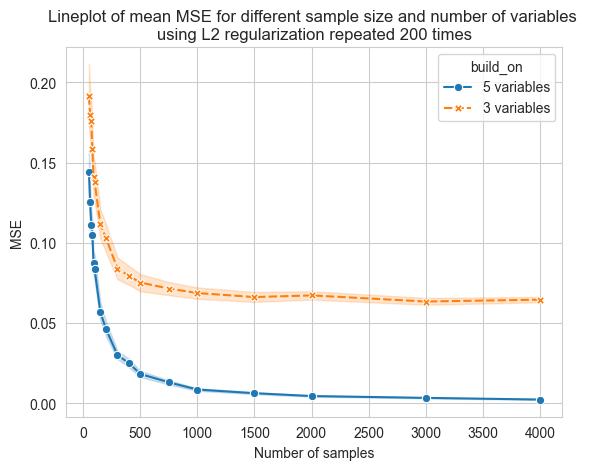

In [62]:
means = data_frame.groupby(["number_of_sample"]).mean().reset_index()
sns.lineplot(
    x="number_of_sample",
    y="mse",
    data=data_frame,
    hue="build_on",
    markers=True,
    style="build_on",
)
plt.title(
    "Lineplot of mean MSE for different sample size and number of variables \nusing L2 regularization repeated 200 times"
)
plt.ylabel("MSE")
plt.xlabel("Number of samples")